In [4]:
from models.Unet import UNet
from dataset.data import BatchMaker
from utils.metrics import SegmentationMetrics
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt



In [5]:
BATCH = 1
path_to_config = '/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Kod/config/config_lab.yaml'
with open(path_to_config, 'r') as config_file:
    config = yaml.safe_load(config_file)
model_path = config['save_model_path'] + '/mixedGT1_best_model'


annotator1 = BatchMaker(config_path=path_to_config, batch_size=BATCH, mode = 'all',segment = 'mixed',annotator= 1)
train_GT1 = annotator1.train_loader
annotator2 = BatchMaker(config_path=path_to_config, batch_size=BATCH, mode = 'all',segment = 'mixed',annotator= 2)
train_GT2 = annotator2.train_loader

/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test_small
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test_small
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test


TypeError: Invalid shape (4, 512, 512) for image data

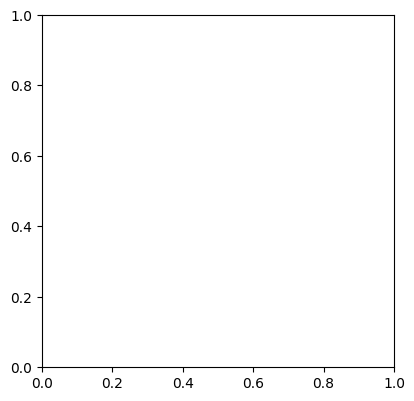

In [6]:
from sklearn.metrics import (
    jaccard_score,
    average_precision_score
)
from utils.metrics import SegmentationMetrics
import seaborn as sns
from sklearn.metrics import average_precision_score


input_images = []
class_masks = []
true_masks = []  

input_images1 = []
class_masks1 = []
true_masks1 = []  
all_true_class_ids = []
all_pred_class_ids = []


for inputs,ids in train_GT1:
    input_images.append(inputs) 
    class_masks.append(ids)

input_images = np.concatenate(input_images, axis=0)
class_masks = np.concatenate(class_masks, axis=0) 


for inputs, ids in train_GT2:
    input_images1.append(inputs)
    class_masks1.append(ids)

input_images1 = np.concatenate(input_images1, axis=0)
class_masks1 = np.concatenate(class_masks1, axis=0) 

#input_images1 = input_images1.transpose((0, 2, 3, 1))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(class_masks[2])
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(class_masks1[2])
plt.axis('off')


metrics = SegmentationMetrics(4)
metrics.update_confusion_matrix(class_masks, class_masks1)
iou_per_class = metrics.calculate_iou_per_class()
mean_iou = metrics.mean_iou()
accuracy = metrics.calculate_accuracy()
cnfMatrix = metrics.confusion_matrix
precision,recall,f1 = metrics.calculate_precision_recall_f1_per_class()
dice = metrics.calculate_dice_score_per_class()
print("IoU scores for each class:", iou_per_class)
print("Mean IoU score:", mean_iou)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("Dice:", dice)


plt.figure(figsize=(7,5))  
sns.heatmap(cnfMatrix, annot=True, fmt=".0f", cmap='Blues')  # Format numbers
plt.title('Confusion Matrix')  
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

plt.figure(figsize=(7,5))
plt.plot(precision[1],recall[1], 'o', label='class 1')






In [26]:
from sklearn.metrics import jaccard_score

# Calculate IoU (Jaccard score) for each class
ious = []
for c in range(class_masks.shape[-1]):
    iou = jaccard_score(class_masks[..., c].flatten(), class_masks1[..., c].flatten())
    ious.append(iou)

# Now ious contains the IoU for each class
for i, iou in enumerate(ious):
    print(f"IoU for class {i}: {iou}")

# If you want the mean IoU across all classes
mean_iou = np.mean(ious)
print("Mean IoU across all classes:", mean_iou)

KeyboardInterrupt: 

In [29]:
classs = 3
iou = jaccard_score(class_masks[0,..., classs].flatten(), class_masks1[0,..., classs].flatten())
print(iou)
iou2 = calculate_iou(class_masks[0,..., classs], class_masks1[0,..., classs])
print(iou2)

0.36033274956217165
0.36033274956217165


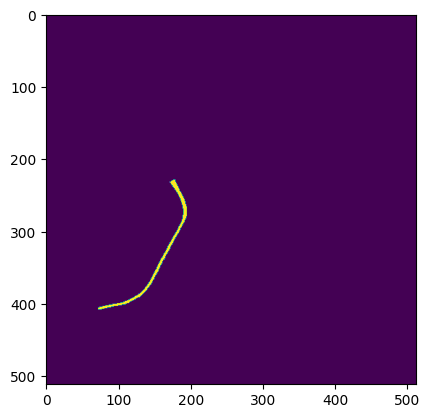

In [24]:
plt.imshow(class_masks[0,..., 1])

In [25]:
def calculate_iou(y_true, y_pred):
    # Flatten the arrays
    y_true = y_true.reshape(-1)
    y_pred = y_pred.reshape(-1)

    # Calculate intersection and union
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()

    # Calculate IoU
    iou = intersection / union

    return iou

# Calculate IoU for each class
ious = []
for c in range(class_masks.shape[-1]):
    iou = calculate_iou(class_masks[..., c], class_masks1[..., c])
    ious.append(iou)

# Now ious contains the IoU for each class
for i, iou in enumerate(ious):
    print(f"IoU for class {i}: {iou}")

# If you want the mean IoU across all classes
mean_iou = np.mean(ious)
print("Mean IoU across all classes:", mean_iou)

IoU for class 0: 0.9939750840052808
IoU for class 1: 0.3689429403379839
IoU for class 2: 0.722969509149901
IoU for class 3: 0.5341894060995185
Mean IoU across all classes: 0.655019234898171


In [37]:
from sklearn.metrics import confusion_matrix

# Initialize a confusion matrix for all classes
total_confusion_matrix = np.zeros((class_masks.shape[-1], class_masks.shape[-1]))

# Calculate confusion matrix for each class
for c in range(class_masks.shape[-1]):
    y_true = class_masks[..., c].flatten()
    y_pred = class_masks1[..., c].flatten()
    
    # Get unique classes and their counts
    unique_classes, counts = np.unique(np.concatenate([y_true, y_pred]), return_counts=True)
    
    # Calculate confusion matrix for the current class
    cm_current = confusion_matrix(y_true, y_pred, labels=unique_classes)
    
    # Create a full confusion matrix and fill in the values from cm_current
    cm_full = np.zeros((class_masks.shape[-1], class_masks.shape[-1]))
    for idx, cls in enumerate(unique_classes):
        cm_full[cls] += cm_current[idx]
    
    # Add the full confusion matrix to the total confusion matrix
    total_confusion_matrix += cm_full

print("Confusion matrix:\n", total_confusion_matrix)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [36]:
def create_confusion_matrix(y_true, y_pred, num_classes):
    # Initialize the confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes))

    # Iterate over each pixel
    for i in range(512):
        for j in range(512):
            # Get the true and predicted class for this pixel
            true_class = np.argmax(y_true[:,i, j])
            pred_class = np.argmax(y_pred[:,i, j])

            # Update the confusion matrix
            confusion_matrix[true_class, pred_class] += 1

    return confusion_matrix

# Create confusion matrix for class_masks and class_masks1
confusion_matrix = create_confusion_matrix(class_masks, class_masks1, class_masks.shape[-1])

print("Confusion matrix:\n", confusion_matrix)

Confusion matrix:
 [[2.5986e+05 6.1800e+02 8.8000e+01 0.0000e+00]
 [6.6100e+02 2.9200e+02 4.0000e+01 0.0000e+00]
 [9.4000e+01 0.0000e+00 4.9100e+02 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]]


In [38]:
import numpy as np
from sklearn.metrics import jaccard_score

def calculate_iou(preds,labels):

    num_classes = preds.shape[1]
    ious = []


    
    for cls in range(num_classes):

        cls_preds = preds[:,cls,:,:]
        cls_labels = labels[:,cls,:,:]

        intersection = np.logical_and(cls_preds, cls_labels).sum()
        union = np.logical_or(cls_preds, cls_labels).sum()
        union = union + 1e-6
        iou = intersection / union
        mean_iou = iou.mean().item()
        ious.append(mean_iou)

    average_iou = (ious[1]+ious[2])/2

    return average_iou, ious


def calculate_iou2(preds,labels):

    num_classes = preds.shape[1]
    ious = []


    
    for cls in range(num_classes):

        cls_preds = preds[:,cls,:,:].flatten()
        cls_labels = labels[:,cls,:,:].flatten()

        iou = jaccard_score(cls_labels, cls_preds)
        ious.append(iou)

    average_iou = (ious[1]+ious[2])/2

    return average_iou, ious


        

In [39]:
avr, ious = calculate_iou(class_masks, class_masks1)

print(avr)
print(ious)

avr, ious = calculate_iou2(class_masks, class_masks1)

print(avr)
print(ious)


0.5459562247431324
[0.9939750840052719, 0.3689429403375594, 0.7229695091487054, 0.5341894060991512]


KeyboardInterrupt: 

In [1]:
import os
from PIL import Image
import numpy as np

# Ścieżki do folderów z maskami dla klas "wić" i "główka"
path_wic = '/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test/For testing/GT_tail'
path_glowka = '/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test/For testing/GT_head'

# Folder docelowy dla złączonych masek
output_path = '/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test/For testing/GT_merge'
os.makedirs(output_path, exist_ok=True)

# Przechodzimy przez wszystkie pliki w jednym z folderów
for filename in os.listdir(path_wic):
    if filename.endswith('.png'):
        # Ścieżki do konkretnych plików maski
        path_wic_file = os.path.join(path_wic, filename)
        path_glowka_file = os.path.join(path_glowka, filename)
        
        # Otwieranie masek
        mask_wic = Image.open(path_wic_file)
        mask_glowka = Image.open(path_glowka_file)
        
        # Konwersja masek do tablic numpy
        mask_wic_array = np.array(mask_wic)
        mask_glowka_array = np.array(mask_glowka)
        
        # Tworzenie pustego obrazu RGB o tej samej wielkości co maski
        merged_image = np.zeros((mask_wic_array.shape[0], mask_wic_array.shape[1], 3), dtype=np.uint8)
        
        # Przypisanie kolorów: wić na zielono, główka na czerwono
        merged_image[mask_wic_array == 255] = [0, 255, 0]  # Zielony gdzie maska wić jest aktywna
        merged_image[mask_glowka_array == 255] = [255, 0, 0]  # Czerwony gdzie maska główka jest aktywna
        
        # Tworzenie obrazu PIL z tablicy numpy
        merged_image_pil = Image.fromarray(merged_image)
        
        # Zapisanie wynikowego obrazu
        merged_image_pil.save(os.path.join(output_path, filename))

print("Zakończono tworzenie masek.")


Zakończono tworzenie masek.
